In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy import signal
import pathlib
path = pathlib.Path.cwd()

plt.rcParams["font.family"] = "serif"
matplotlib.rcParams.update({'font.size': 13})

## Bootstrap Results

1
25
10
5


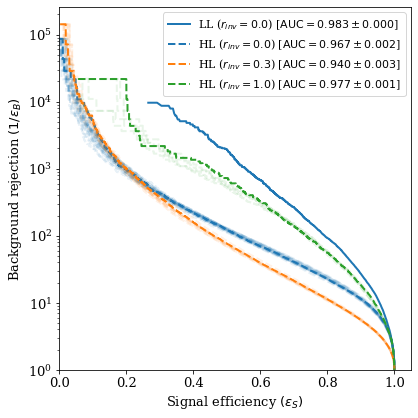

In [10]:
rinvs = ["0p0", "0p3", "1p0"]
data_types = ["LL", "HL"]
colors = ["tab:blue", "tab:orange", "tab:green"]

plt.figure(figsize=(6, 6))

for rix, rinv in enumerate(rinvs):
    for data_type in data_types:
        auc_file = path / f'{data_type}_training' / 'bootstrap_results' / rinv / 'aucs.csv'
        if auc_file.exists():
            aucs = pd.read_csv(auc_file).auc.values
            print(len(aucs))
            auc_avg, auc_ci = np.mean(aucs), np.percentile(aucs, (2.5, 97.5))
            auc_ci_max = max(np.abs(auc_ci[0] - auc_avg), np.abs(auc_ci[1] - auc_avg))
            roc_path = path / f'{data_type}_training' / 'bootstrap_results' / rinv / 'roc'
            for ix, (roc_file, auc) in enumerate(zip(list(roc_path.glob('*')), aucs)):
                roc_df = pd.read_csv(roc_file, index_col=0)
                rinv_str = rinv.replace("p", ".")
                if data_type == "HL":
                    ls = "--"
                else:
                    ls = "-"
                if ix == len(aucs)-1:
                    label = '%s ($r_{inv} = %s$) [$\mathrm{AUC} = %0.3f \pm %0.3f$]' %(data_type, rinv_str, auc_avg, auc_ci_max)
                    alpha = 1
                else:
                    label = None
                    alpha = 0.1
                plt.plot(roc_df.sig_eff, 1. / roc_df.bkg_eff, lw=2, color=colors[rix], alpha=alpha, linestyle=ls, label=label)
plt.yscale('log')
plt.xlim(left=0)
plt.ylim(bottom=1)
plt.xlabel('Signal efficiency $(\epsilon_S)$')
plt.ylabel('Background rejection $(1 / \epsilon_B)$')
plt.legend(loc='upper right', fontsize="11")
plt.tight_layout()
plt.savefig(path / "figures" / "bootstrap_roc.png")
plt.savefig(path / "figures" / "bootstrap_roc.pdf")

## Separate by rinv

1
25
1
10
5


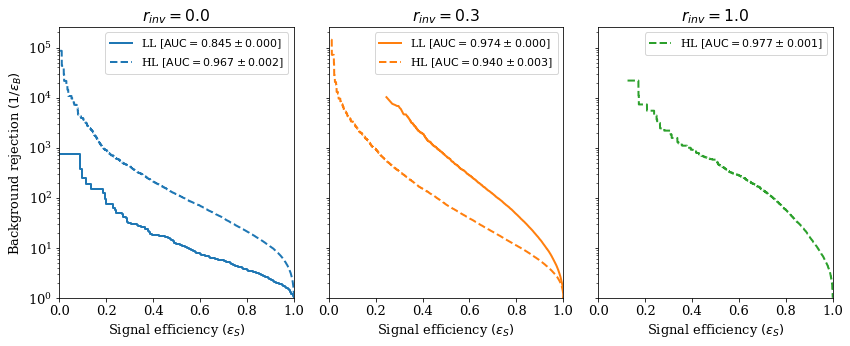

In [10]:
rinvs = ["0p0", "0p3", "1p0"]
data_types = ["LL", "HL"]
colors = ["tab:blue", "tab:orange", "tab:green"]

fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
for rix, rinv in enumerate(rinvs):
    for data_type in data_types:
        auc_file = path / f'{data_type}_training' / 'bootstrap_results' / rinv / 'aucs.csv'
        if auc_file.exists():
            aucs = pd.read_csv(auc_file).auc.values
            print(len(aucs))
            auc_avg, auc_ci = np.mean(aucs), np.percentile(aucs, (2.5, 97.5))
            auc_ci_max = max(np.abs(auc_ci[0] - auc_avg), np.abs(auc_ci[1] - auc_avg))
            roc_path = path / f'{data_type}_training' / 'bootstrap_results' / rinv / 'roc'
            for ix, (roc_file, auc) in enumerate(zip(list(roc_path.glob('*')), aucs)):
                roc_df = pd.read_csv(roc_file, index_col=0)
                rinv_str = rinv.replace("p", ".")
                if data_type == "HL":
                    ls = "--"
                else:
                    ls = "-"
                label = '%s [$\mathrm{AUC} = %0.3f \pm %0.3f$]' %(data_type, auc_avg, auc_ci_max)
                alpha = 1
                axs[rix].set_title("$r_{inv} = %s$" %rinv_str)
                axs[rix].plot(roc_df.sig_eff, 1. / roc_df.bkg_eff, lw=2, color=colors[rix], alpha=alpha, linestyle=ls, label=label)
                axs[rix].legend(loc='upper right', fontsize="11")
                axs[rix].set_xlabel('Signal efficiency $(\epsilon_S)$')
                axs[rix].set_xlim(left=0, right=1)
                if ix == 0:
                    break
plt.yscale('log')

plt.ylim(bottom=1)
axs[0].set_ylabel('Background rejection $(1 / \epsilon_B)$')
plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig(path / "figures" / "bootstrap_roc.png")
plt.savefig(path / "figures" / "bootstrap_roc.pdf")

In [4]:
rinvs = ['1p0', '0p0', '0p3']
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(8, 6))
for ix, rinv in enumerate(rinvs):
    hl_file = path / 'HL-training' / 'roc_df' / f'{rinv}.csv' 
    ll_file = path / 'LL-training' / 'roc_df' / f'{rinv}.csv' 
    hl_auc = float(open(path / 'HL-training' / 'roc_df' / f'auc-{rinv}.txt', 'r').read())
    ll_auc = float(open(path / 'LL-training' / 'roc_df' / f'auc-{rinv}.txt', 'r').read())
    hl = pd.read_csv(hl_file, index_col=0)
    ll = pd.read_csv(ll_file, index_col=0)
    
    rinv_str = rinv.replace("p", ".")
    plt.plot(ll.sig_eff, 1. / ll.bkg_eff, lw=2, color=colors[ix], label='LL $r_{inv} = %s$ (AUC=%0.3f)' %(rinv_str, ll_auc))
    plt.plot(hl.sig_eff, 1. / hl.bkg_eff, linestyle='--', lw=2, color=colors[ix], label='HL $r_{inv} = %s$ (AUC=%0.3f)' %(rinv_str, hl_auc))
    plt.yscale('log')
    plt.xlim([0,1])
    plt.ylim([1, 1e5])
    plt.xlabel('Signal efficiency $(\epsilon_S)$')
    plt.ylabel('Background rejection $(1 / \epsilon_B)$')
    plt.legend(loc='upper right')

FileNotFoundError: [Errno 2] No such file or directory: '/media/green/Dropbox/Projects/semi-visible-jets-ml/HL-training/roc_df/auc-1p0.txt'

<Figure size 576x432 with 0 Axes>